<a href="https://colab.research.google.com/github/Harshit0502/FraudFence/blob/main/FraudFence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/sample_data/new_file.csv')

In [21]:
# Display the first few rows of the dataset
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0      0.0  
1  M2044282225             0.0             0.0      0.0  
2   C553264065             0.0             0.0      1.0  
3    C38997010         21182.0             0.0      1.0  
4  M1230701703             0.0             0.0      0.0  


In [22]:
# Basic dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095623 entries, 0 to 1095622
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1095623 non-null  int64  
 1   type            1095623 non-null  object 
 2   amount          1095622 non-null  float64
 3   nameOrig        1095622 non-null  object 
 4   oldbalanceOrg   1095622 non-null  float64
 5   newbalanceOrig  1095622 non-null  float64
 6   nameDest        1095622 non-null  object 
 7   oldbalanceDest  1095622 non-null  float64
 8   newbalanceDest  1095622 non-null  float64
 9   isFraud         1095622 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 83.6+ MB


In [23]:
# Summary statistics of the dataset
print(data.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  1.095623e+06  1.095622e+06   1.095622e+06    1.095622e+06   
mean   3.092586e+01  1.591723e+05   8.714316e+05    8.909830e+05   
std    2.430826e+01  2.713155e+05   2.953807e+06    2.990284e+06   
min    1.000000e+00  1.000000e-01   0.000000e+00    0.000000e+00   
25%    1.500000e+01  1.194491e+04   0.000000e+00    0.000000e+00   
50%    2.100000e+01  7.507680e+04   1.599900e+04    0.000000e+00   
75%    4.000000e+01  2.133230e+05   1.348547e+05    1.720879e+05   
max    1.300000e+02  1.000000e+07   3.893942e+07    3.894623e+07   

       oldbalanceDest  newbalanceDest       isFraud  
count    1.095622e+06    1.095622e+06  1.095622e+06  
mean     9.759388e+05    1.110824e+06  1.358133e-03  
std      2.295313e+06    2.414698e+06  3.682783e-02  
min      0.000000e+00    0.000000e+00  0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00  
50%      1.222342e+05    2.129420e+05  0.000000e+00  
75%      

In [24]:
# Identify categorical and numerical variables
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols), object_cols)

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols), num_cols)

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols), fl_cols)

Categorical variables: 3 ['type', 'nameOrig', 'nameDest']
Integer variables: 1 ['step']
Float variables: 6 ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']


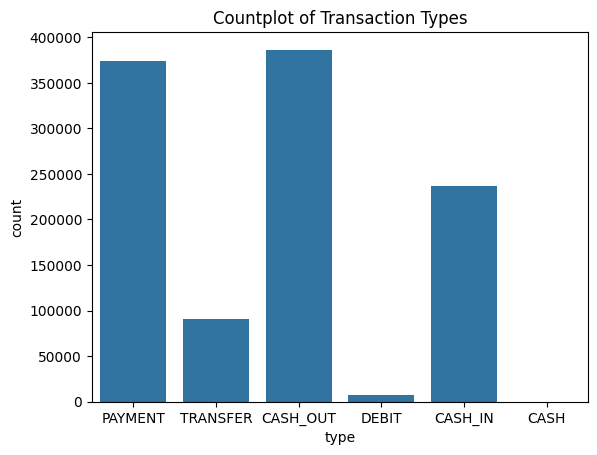

In [25]:
# Data visualization
sns.countplot(x='type', data=data)
plt.title("Countplot of Transaction Types")
plt.show()

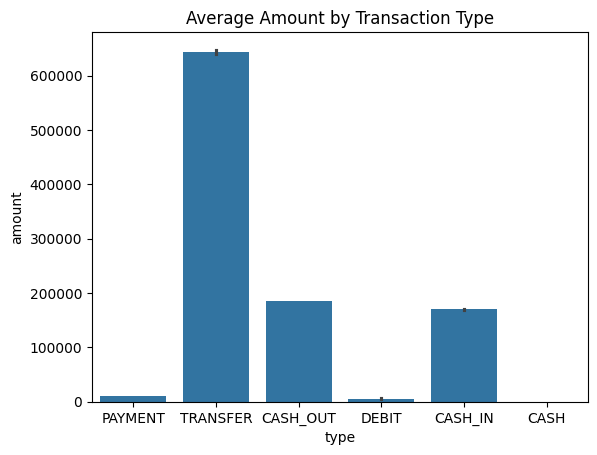

In [26]:
sns.barplot(x='type', y='amount', data=data)
plt.title("Average Amount by Transaction Type")
plt.show()

In [27]:
# Distribution of 'isFraud'
print(data['isFraud'].value_counts())

isFraud
0.0    1094134
1.0       1488
Name: count, dtype: int64


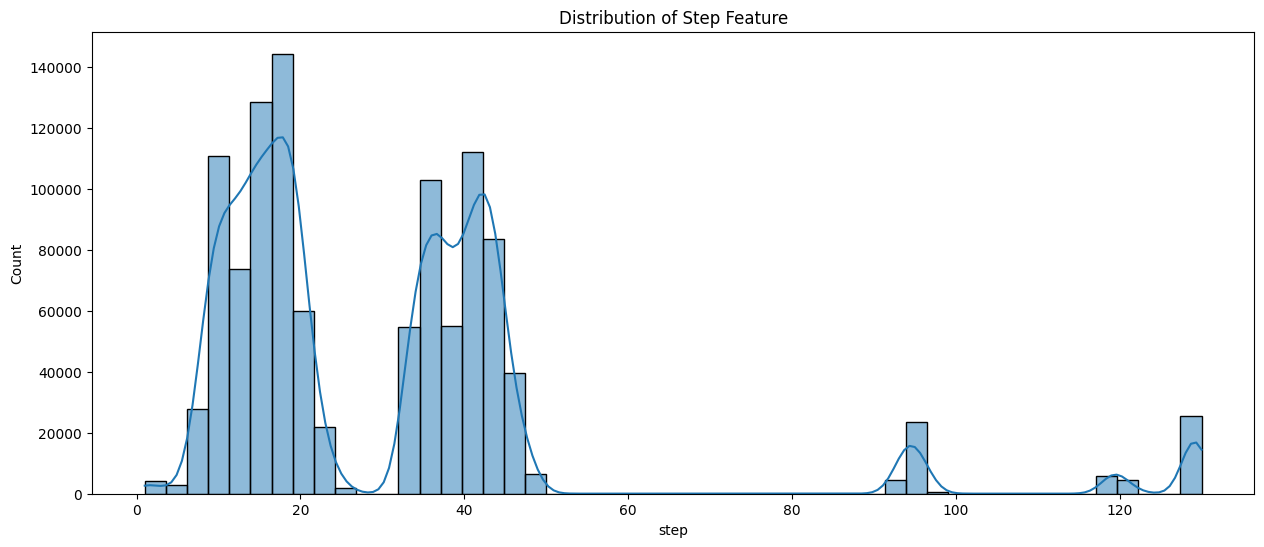

In [28]:
plt.figure(figsize=(15, 6))
sns.histplot(data['step'], bins=50, kde=True)
plt.title("Distribution of Step Feature")
plt.show()

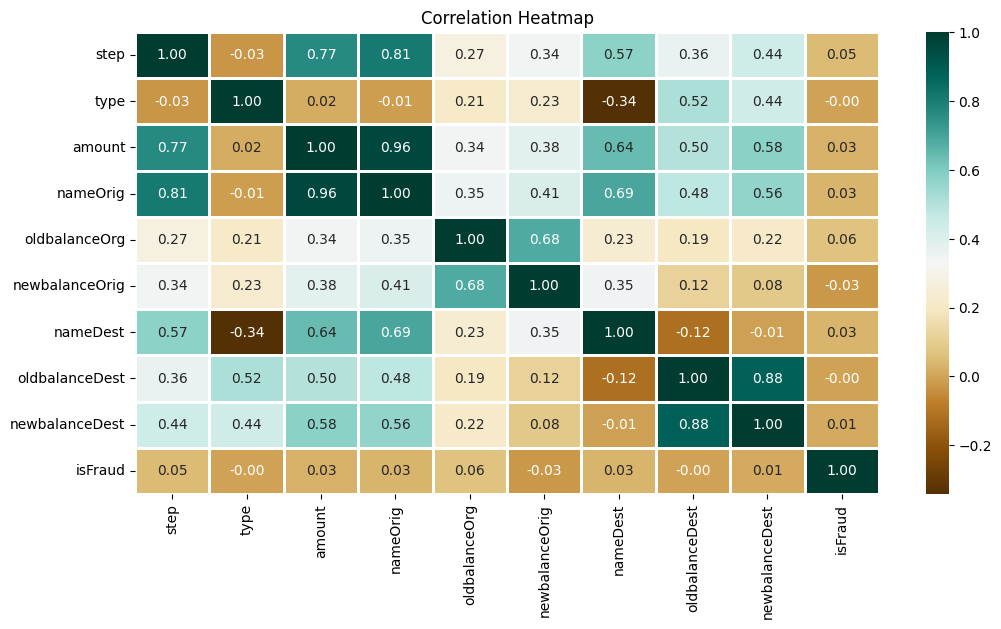

In [29]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    data.apply(lambda x: pd.factorize(x)[0]).corr(),
    cmap='BrBG',
    fmt='.2f',
    linewidths=2,
    annot=True
)
plt.title("Correlation Heatmap")
plt.show()

In [30]:
# Encode categorical 'type' column
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)

# Display the first few rows of the modified dataset
print(data_new.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  CASH_IN  CASH_OUT  \
0  M1979787155             0.0             0.0      0.0    False     False   
1  M2044282225             0.0             0.0      0.0    False     False   
2   C553264065             0.0             0.0      1.0    False     False   
3    C38997010         21182.0             0.0      1.0    False      True   
4  M1230701703             0.0             0.0      0.0    False     False   

   DEBIT  PAYMENT  TRANSFER  
0  False     True     False  
1  False     True   

In [31]:
# Define features (X) and target (y)
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

print(f"Shape of features: {X.shape}, Shape of target: {y.shape}")

Shape of features: (1095623, 11), Shape of target: (1095623,)


In [32]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

LogisticRegression:
Training AUC-ROC Score: 0.5044142147551886
Validation AUC-ROC Score: 0.5291480609973656



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:21:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier:
Training AUC-ROC Score: 0.9768224476722736
Validation AUC-ROC Score: 0.5073228458482449

RandomForestClassifier:
Training AUC-ROC Score: 0.9983591533822436
Validation AUC-ROC Score: 0.498397615244529



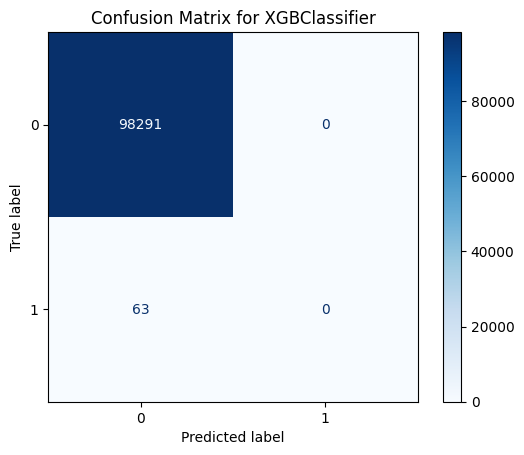

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score as ras
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Impute missing values for numerical columns
imputer = SimpleImputer(strategy='mean')

# Impute missing values in features (X)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Ensure target variable (y) has no missing values
# Drop rows with NaN in target variable before training
train_data = pd.DataFrame(X_train)
train_data['target'] = y_train
train_data = train_data.dropna(subset=['target'])  # Drop rows where y_train is NaN
X_train = train_data.drop(columns=['target']).values
y_train = train_data['target'].values

test_data = pd.DataFrame(X_test)
test_data['target'] = y_test
test_data = test_data.dropna(subset=['target'])  # Drop rows where y_test is NaN
X_test = test_data.drop(columns=['target']).values
y_test = test_data['target'].values

# Define models to evaluate
models = [
    LogisticRegression(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
]

# Evaluate each model
for model in models:
    model.fit(X_train, y_train)
    print(f"{model.__class__.__name__}:")

    # Calculate and print training AUC-ROC score
    train_preds = model.predict_proba(X_train)[:, 1]
    print("Training AUC-ROC Score:", ras(y_train, train_preds))

    # Calculate and print validation AUC-ROC score
    y_preds = model.predict_proba(X_test)[:, 1]
    print("Validation AUC-ROC Score:", ras(y_test, y_preds))
    print()

# Display the confusion matrix for the best-performing model
best_model = models[1]  # Assuming XGBClassifier performs the best

# Predict the labels for the test set
y_pred = best_model.predict(X_test)

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

disp.plot(cmap='Blues')
plt.title("Confusion Matrix for XGBClassifier")
plt.show()
